## Setup and Installation

In [1]:
!pip install -q sentence-transformers scikit-learn umap-learn numpy pandas matplotlib seaborn
print("✓ Libraries installed")

✓ Libraries installed


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import umap

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
np.random.seed(42)

print("✓ All imports successful")

✓ All imports successful


## 1. Load ArXiv Research Paper Dataset

Creating a unique dataset of research paper abstracts from different fields.

In [3]:
# Create synthetic research paper abstracts across 5 topics
documents = []
labels = []
topics = ['Machine Learning', 'Quantum Computing', 'Bioinformatics', 'Climate Science', 'Blockchain']

# Machine Learning abstracts
ml_abstracts = [
    "We propose a novel deep learning architecture for image classification using attention mechanisms and residual connections. Our model achieves state-of-the-art performance on ImageNet.",
    "This paper introduces a new reinforcement learning algorithm that improves sample efficiency through curriculum learning and reward shaping techniques.",
    "We present a transformer-based model for natural language processing tasks. The model uses self-attention and achieves superior results on GLUE benchmarks.",
    "A comprehensive study of convolutional neural networks for object detection in autonomous driving scenarios. We evaluate various architectures on real-world datasets.",
    "This work explores few-shot learning methods using meta-learning and prototypical networks. Results show significant improvements on miniImageNet.",
    "We develop a generative adversarial network for high-resolution image synthesis with improved training stability and mode diversity.",
    "An investigation of transfer learning techniques for medical image analysis. We demonstrate how pre-trained models improve diagnostic accuracy.",
    "This paper proposes a neural architecture search method that automatically discovers optimal network designs for specific tasks using evolutionary algorithms.",
    "We introduce a self-supervised learning framework that learns powerful representations from unlabeled data using contrastive loss functions.",
    "A novel approach to interpretable machine learning using attention mechanisms and saliency maps to explain model predictions.",
    "This study examines recurrent neural networks for time series forecasting with applications to financial markets and weather prediction.",
    "We present a graph neural network architecture for molecular property prediction with applications in drug discovery and materials science.",
]

# Quantum Computing abstracts
quantum_abstracts = [
    "We demonstrate quantum supremacy using a 53-qubit quantum processor. Our system performs computations infeasible for classical supercomputers.",
    "This paper explores quantum error correction codes for fault-tolerant quantum computing. We propose new surface code variants with improved thresholds.",
    "An investigation of quantum algorithms for optimization problems. We show quantum annealing outperforms classical methods on specific NP-hard problems.",
    "We develop a quantum machine learning algorithm that leverages quantum superposition for exponential speedup in pattern recognition tasks.",
    "This work presents advances in ion trap quantum computing with improved gate fidelities and longer coherence times.",
    "A study of quantum entanglement and its applications in quantum cryptography and secure communication protocols.",
    "We propose a variational quantum eigensolver for quantum chemistry simulations. Results show accurate molecular energy predictions.",
    "This paper examines quantum walks on graphs and their applications to search algorithms with quadratic speedup over classical approaches.",
    "An analysis of topological quantum computing using anyons and Majorana fermions for robust quantum information processing.",
    "We demonstrate quantum teleportation across metropolitan distances using fiber-optic networks and satellite links.",
    "This study investigates hybrid quantum-classical algorithms for solving combinatorial optimization in logistics and scheduling.",
    "We present experimental results on quantum simulation of many-body physics using programmable quantum processors.",
]

# Bioinformatics abstracts
bio_abstracts = [
    "We develop a computational method for protein structure prediction using evolutionary information and deep learning. Accuracy rivals AlphaFold on benchmark datasets.",
    "This paper presents a genome assembly algorithm that handles long-read sequencing data with improved accuracy for repeat regions.",
    "An investigation of gene regulatory networks using single-cell RNA sequencing data. We identify novel cell types and differentiation pathways.",
    "We propose a machine learning approach for drug-target interaction prediction with applications in precision medicine and personalized therapy.",
    "This work analyzes metagenomic data to characterize microbiome composition and its relationship to human health and disease.",
    "A study of CRISPR gene editing efficiency prediction using sequence features and machine learning models.",
    "We develop computational tools for variant calling and annotation in whole genome sequencing studies of cancer patients.",
    "This paper explores phylogenetic tree reconstruction methods using maximum likelihood and Bayesian approaches for evolutionary analysis.",
    "An investigation of protein-protein interaction networks and their role in cellular signaling pathways and disease mechanisms.",
    "We present a deep learning model for predicting transcription factor binding sites from DNA sequence and chromatin accessibility data.",
    "This study examines differential gene expression analysis methods for RNA-seq data with applications to developmental biology.",
    "We develop algorithms for metabolic pathway reconstruction from omics data to understand cellular metabolism and disease.",
]

# Climate Science abstracts
climate_abstracts = [
    "We analyze global temperature trends using satellite data and climate models. Results project significant warming by 2100 under current emissions scenarios.",
    "This paper investigates ocean circulation patterns and their impact on heat distribution and sea level rise using coupled atmosphere-ocean models.",
    "An examination of extreme weather events frequency and intensity in the context of climate change using statistical downscaling methods.",
    "We develop machine learning models for seasonal precipitation forecasting with improved accuracy over traditional meteorological approaches.",
    "This work studies ice sheet dynamics in Antarctica and Greenland using remote sensing and ice flow simulations to project contribution to sea level rise.",
    "A comprehensive analysis of carbon cycle feedbacks in Earth system models and their implications for climate sensitivity.",
    "We investigate atmospheric aerosol effects on cloud formation and albedo with implications for geoengineering proposals.",
    "This paper examines coral reef bleaching patterns in relation to ocean temperature anomalies and acidification trends.",
    "An analysis of renewable energy potential and grid integration challenges in the transition to carbon-neutral economies.",
    "We model permafrost thaw dynamics and methane release using coupled climate-carbon models to assess tipping point risks.",
    "This study investigates vegetation responses to elevated CO2 and changing precipitation patterns using ecosystem models.",
    "We develop high-resolution climate projections for regional adaptation planning using dynamical downscaling techniques.",
]

# Blockchain abstracts
blockchain_abstracts = [
    "We propose a scalable blockchain consensus mechanism that achieves high throughput without compromising decentralization or security properties.",
    "This paper analyzes smart contract vulnerabilities and presents formal verification methods to ensure correctness and prevent exploits.",
    "An investigation of decentralized finance (DeFi) protocols and their economic mechanisms including automated market makers and lending platforms.",
    "We develop privacy-preserving blockchain techniques using zero-knowledge proofs and homomorphic encryption for confidential transactions.",
    "This work examines blockchain interoperability solutions including cross-chain communication protocols and atomic swaps.",
    "A study of energy consumption in proof-of-work cryptocurrencies and alternative consensus mechanisms for sustainable blockchain systems.",
    "We present a decentralized identity management system using blockchain technology for self-sovereign digital identities.",
    "This paper investigates non-fungible tokens (NFTs) and their applications in digital art, gaming, and intellectual property rights.",
    "An analysis of blockchain governance models and on-chain voting mechanisms for decentralized autonomous organizations.",
    "We develop layer-2 scaling solutions for Ethereum including optimistic rollups and zero-knowledge rollups for improved transaction throughput.",
    "This study examines central bank digital currencies (CBDCs) and their implications for monetary policy and financial stability.",
    "We propose blockchain-based supply chain tracking systems with enhanced transparency and traceability for product authenticity.",
]

# Combine all abstracts
all_abstracts = ml_abstracts + quantum_abstracts + bio_abstracts + climate_abstracts + blockchain_abstracts
all_labels = ([0]*len(ml_abstracts) + [1]*len(quantum_abstracts) + [2]*len(bio_abstracts) +
              [3]*len(climate_abstracts) + [4]*len(blockchain_abstracts))

# Create DataFrame
df_papers = pd.DataFrame({
    'abstract': all_abstracts,
    'topic': all_labels,
    'topic_name': [topics[label] for label in all_labels]
})

print(f"Dataset: {len(df_papers)} research paper abstracts")
print(f"\nTopic distribution:")
print(df_papers['topic_name'].value_counts())
print("\nSample abstracts:")
for i, row in df_papers.head(3).iterrows():
    print(f"\n[{row['topic_name']}]")
    print(f"{row['abstract'][:150]}...")

Dataset: 60 research paper abstracts

Topic distribution:
topic_name
Machine Learning     12
Quantum Computing    12
Bioinformatics       12
Climate Science      12
Blockchain           12
Name: count, dtype: int64

Sample abstracts:

[Machine Learning]
We propose a novel deep learning architecture for image classification using attention mechanisms and residual connections. Our model achieves state-o...

[Machine Learning]
This paper introduces a new reinforcement learning algorithm that improves sample efficiency through curriculum learning and reward shaping techniques...

[Machine Learning]
We present a transformer-based model for natural language processing tasks. The model uses self-attention and achieves superior results on GLUE benchm...


## 2. Generate Sentence Embeddings

Using a pre-trained transformer model to create semantic embeddings.

In [4]:
# Load pre-trained sentence transformer model
print("Loading sentence transformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and effective model

print("Generating embeddings for all abstracts...")
embeddings = model.encode(df_papers['abstract'].tolist(), show_progress_bar=True)

print(f"\nEmbedding shape: {embeddings.shape}")
print(f"Each abstract is represented by a {embeddings.shape[1]}-dimensional vector")
print("✓ Embeddings generated")

Loading sentence transformer model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating embeddings for all abstracts...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]


Embedding shape: (60, 384)
Each abstract is represented by a 384-dimensional vector
✓ Embeddings generated


### Visualize Embedding Similarity

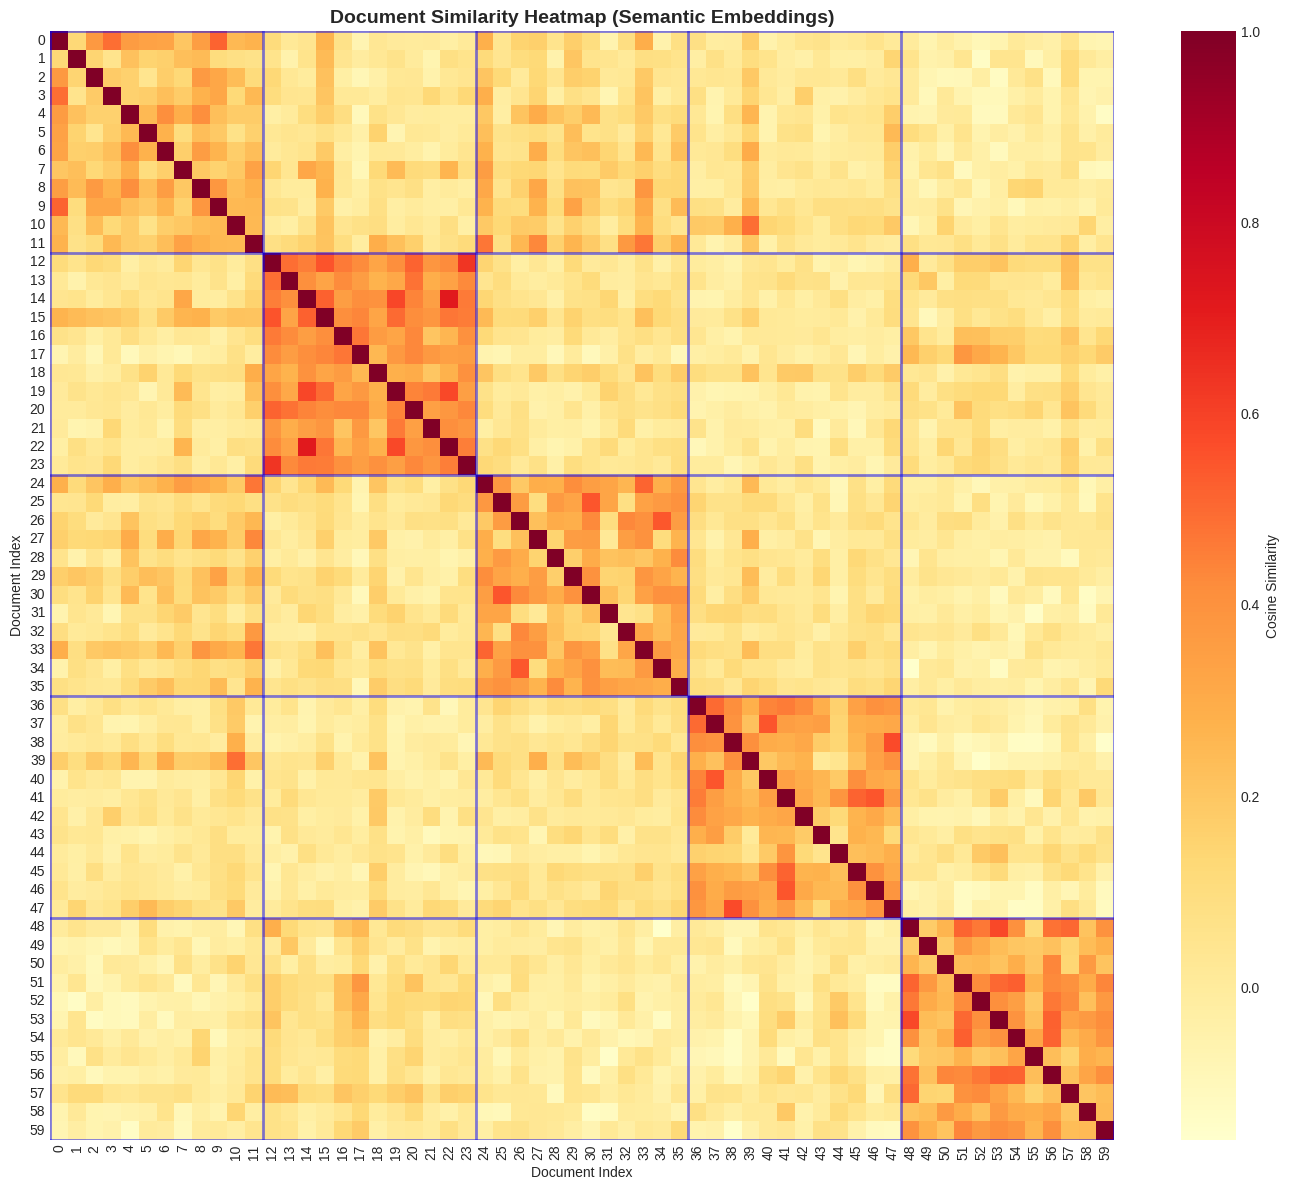

Block diagonal structure shows documents within same topic are more similar


In [5]:
# Calculate cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(similarity_matrix, cmap='YlOrRd', cbar_kws={'label': 'Cosine Similarity'})
plt.title('Document Similarity Heatmap (Semantic Embeddings)',
          fontweight='bold', fontsize=14)
plt.xlabel('Document Index')
plt.ylabel('Document Index')

# Add topic boundaries
boundaries = [0, 12, 24, 36, 48, 60]
for b in boundaries:
    plt.axhline(y=b, color='blue', linewidth=2, alpha=0.5)
    plt.axvline(x=b, color='blue', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

print("Block diagonal structure shows documents within same topic are more similar")

## 3. Dimensionality Reduction for Visualization

Applying dimensionality reduction...

1. PCA...
   Explained variance: 20.14%
2. t-SNE...
   ✓ Complete
3. UMAP...
   ✓ Complete


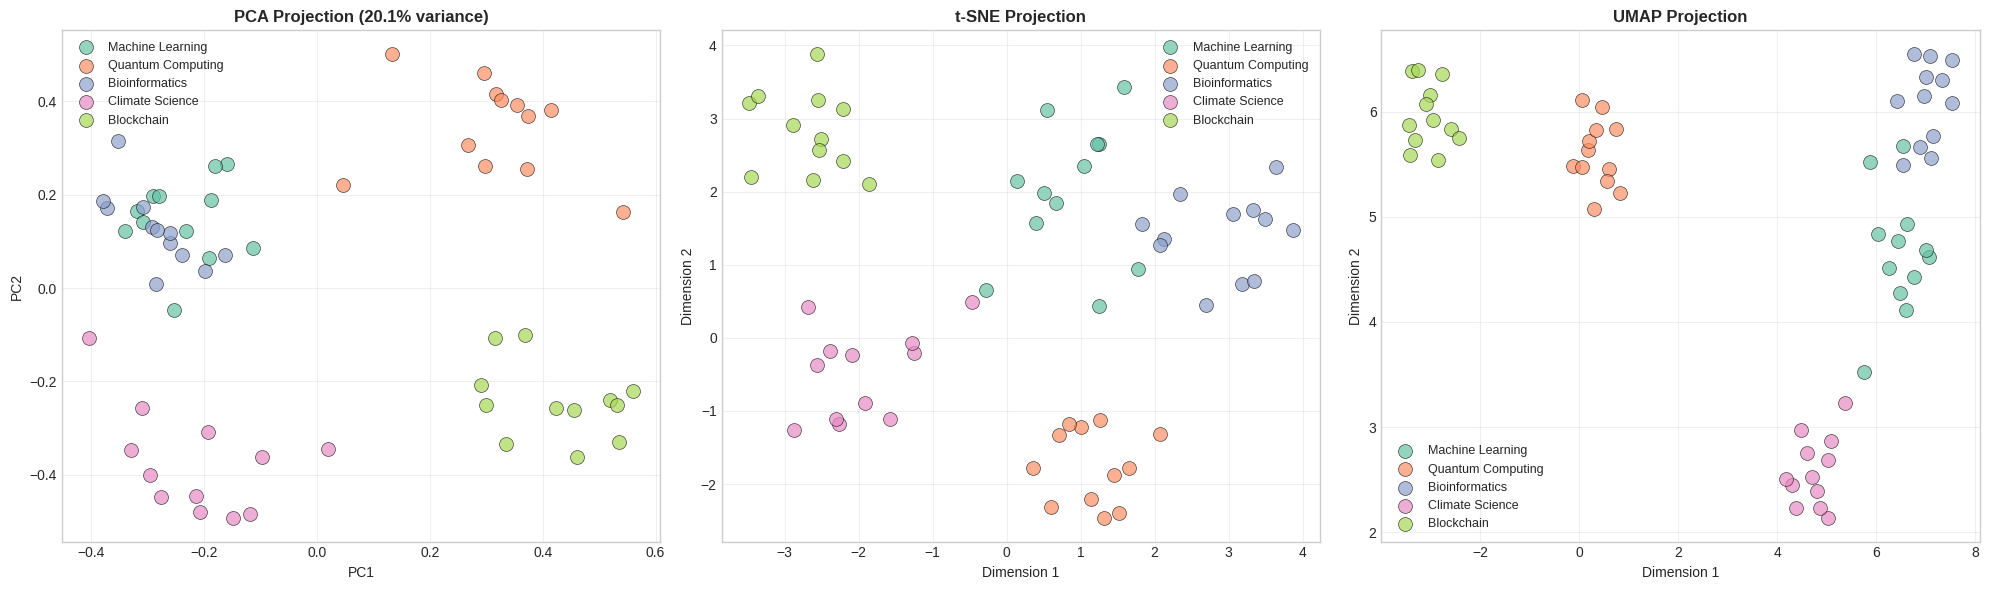


UMAP typically provides the best cluster separation for high-dimensional data


In [6]:
# Apply multiple dimensionality reduction techniques
print("Applying dimensionality reduction...\n")

# PCA
print("1. PCA...")
pca = PCA(n_components=2, random_state=42)
embeddings_pca = pca.fit_transform(embeddings)
print(f"   Explained variance: {pca.explained_variance_ratio_.sum():.2%}")

# t-SNE
print("2. t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_tsne = tsne.fit_transform(embeddings)
print("   ✓ Complete")

# UMAP
print("3. UMAP...")
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
embeddings_umap = umap_model.fit_transform(embeddings)
print("   ✓ Complete")

# Visualize all three
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

scatter_params = {'s': 100, 'alpha': 0.7, 'edgecolors': 'black', 'linewidth': 0.5}

# PCA
for i, topic in enumerate(topics):
    mask = df_papers['topic'] == i
    axes[0].scatter(embeddings_pca[mask, 0], embeddings_pca[mask, 1],
                   label=topic, **scatter_params)
axes[0].set_title(f'PCA Projection ({pca.explained_variance_ratio_.sum():.1%} variance)',
                 fontweight='bold', fontsize=12)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(alpha=0.3)

# t-SNE
for i, topic in enumerate(topics):
    mask = df_papers['topic'] == i
    axes[1].scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1],
                   label=topic, **scatter_params)
axes[1].set_title('t-SNE Projection', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend(loc='best', fontsize=9)
axes[1].grid(alpha=0.3)

# UMAP
for i, topic in enumerate(topics):
    mask = df_papers['topic'] == i
    axes[2].scatter(embeddings_umap[mask, 0], embeddings_umap[mask, 1],
                   label=topic, **scatter_params)
axes[2].set_title('UMAP Projection', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Dimension 1')
axes[2].set_ylabel('Dimension 2')
axes[2].legend(loc='best', fontsize=9)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nUMAP typically provides the best cluster separation for high-dimensional data")

## 4. Finding Optimal Number of Clusters

Testing different numbers of clusters...
K=2: Inertia=48.04, Silhouette=0.088
K=3: Inertia=43.99, Silhouette=0.101
K=4: Inertia=40.09, Silhouette=0.124
K=5: Inertia=37.78, Silhouette=0.123
K=6: Inertia=36.69, Silhouette=0.110
K=7: Inertia=35.56, Silhouette=0.094
K=8: Inertia=34.58, Silhouette=0.073
K=9: Inertia=33.70, Silhouette=0.069
K=10: Inertia=32.60, Silhouette=0.066


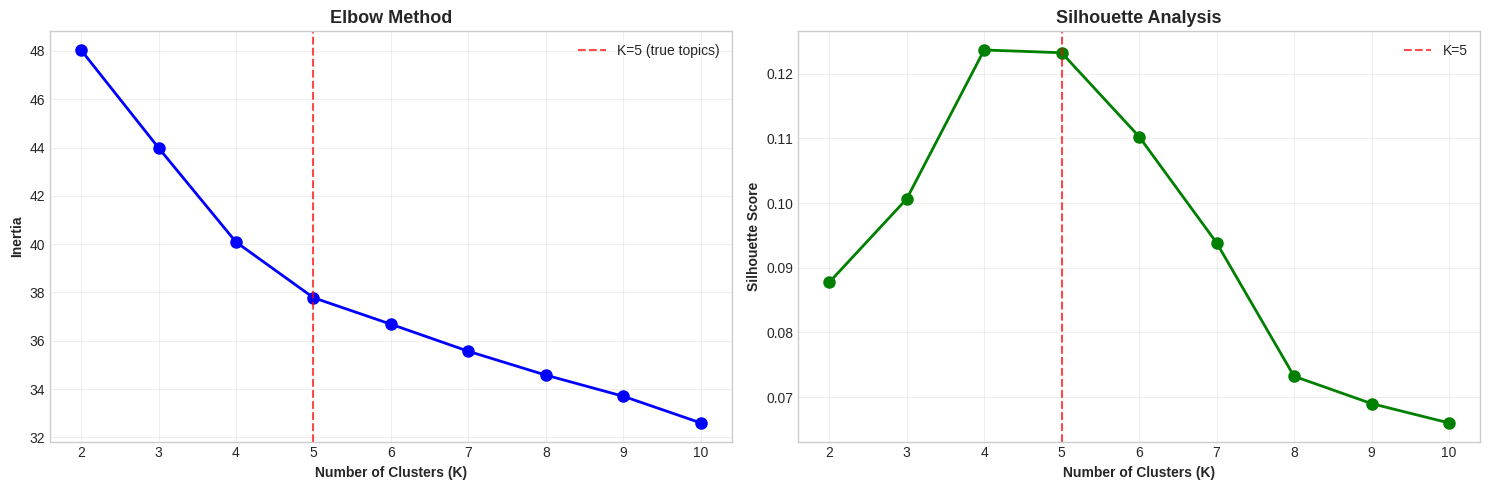

In [7]:
# Elbow method and silhouette analysis
inertias = []
silhouettes = []
k_range = range(2, 11)

print("Testing different numbers of clusters...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(embeddings, labels))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouettes[-1]:.3f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontweight='bold')
axes[0].set_ylabel('Inertia', fontweight='bold')
axes[0].set_title('Elbow Method', fontweight='bold', fontsize=13)
axes[0].axvline(x=5, color='r', linestyle='--', alpha=0.7, label='K=5 (true topics)')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontweight='bold')
axes[1].set_title('Silhouette Analysis', fontweight='bold', fontsize=13)
axes[1].axvline(x=5, color='r', linestyle='--', alpha=0.7, label='K=5')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. K-Means Clustering on Embeddings

In [8]:
# Perform K-Means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
labels_kmeans = kmeans.fit_predict(embeddings)

print("="*60)
print("K-MEANS CLUSTERING RESULTS")
print("="*60)
print(f"Number of clusters: {n_clusters}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print("\nCluster sizes:")
for i in range(n_clusters):
    count = np.sum(labels_kmeans == i)
    print(f"  Cluster {i}: {count} documents ({count/len(labels_kmeans)*100:.1f}%)")
print("="*60)

# Add predictions to dataframe
df_papers['cluster_kmeans'] = labels_kmeans

K-MEANS CLUSTERING RESULTS
Number of clusters: 5
Inertia: 37.78

Cluster sizes:
  Cluster 0: 12 documents (20.0%)
  Cluster 1: 13 documents (21.7%)
  Cluster 2: 12 documents (20.0%)
  Cluster 3: 12 documents (20.0%)
  Cluster 4: 11 documents (18.3%)


### Visualize K-Means Results

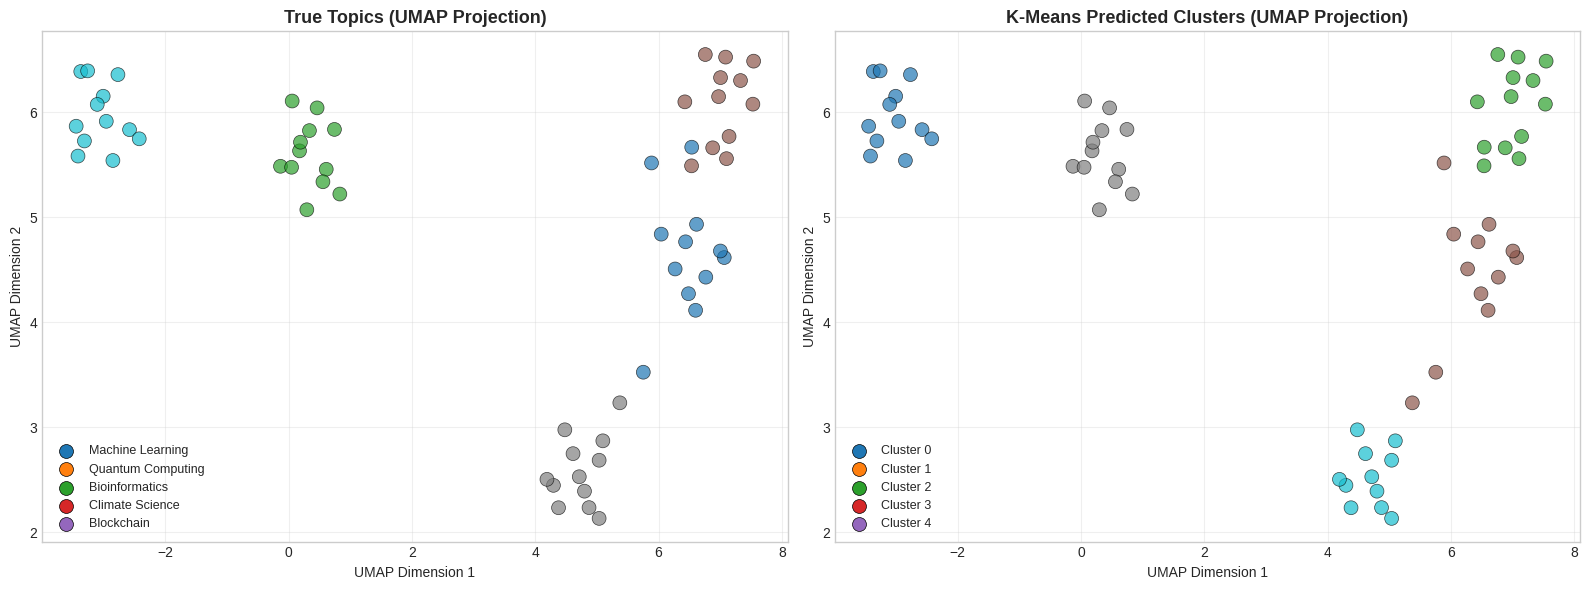

In [9]:
# Visualize using UMAP (best for semantic embeddings)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# True labels
scatter1 = axes[0].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                          c=df_papers['topic'], cmap='tab10',
                          s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0].set_title('True Topics (UMAP Projection)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('UMAP Dimension 1')
axes[0].set_ylabel('UMAP Dimension 2')
axes[0].grid(alpha=0.3)
# Add legend
for i, topic in enumerate(topics):
    axes[0].scatter([], [], c=plt.cm.tab10(i/10), s=100, label=topic, edgecolors='black', linewidth=0.5)
axes[0].legend(loc='best', fontsize=9)

# Predicted clusters
scatter2 = axes[1].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                          c=labels_kmeans, cmap='tab10',
                          s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[1].set_title('K-Means Predicted Clusters (UMAP Projection)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')
axes[1].grid(alpha=0.3)
# Add legend
for i in range(n_clusters):
    axes[1].scatter([], [], c=plt.cm.tab10(i/10), s=100, label=f'Cluster {i}', edgecolors='black', linewidth=0.5)
axes[1].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.show()

## 6. Clustering Quality Metrics


CLUSTERING QUALITY METRICS (K-Means)

📊 Internal Metrics:
  • Silhouette Score: 0.1233
  • Davies-Bouldin Index: 2.2804
  • Calinski-Harabasz Score: 5.77

📊 External Metrics (vs true topics):
  • Adjusted Rand Index: 0.9163
  • Normalized Mutual Information: 0.9282


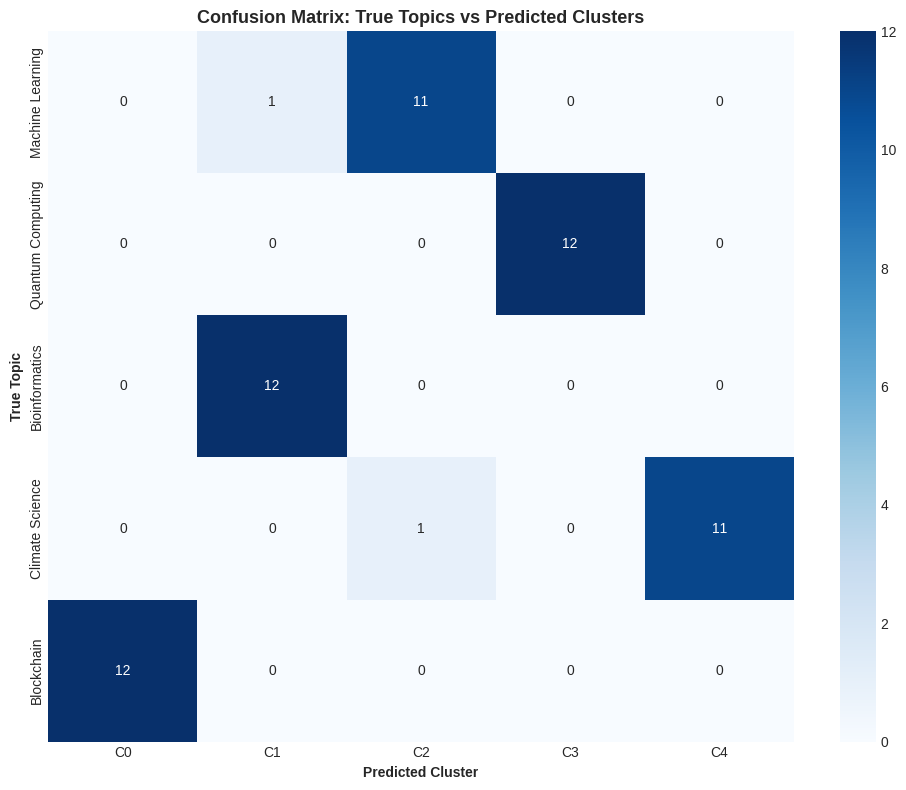


Semantic embeddings capture topic similarity well!


In [10]:
# Calculate metrics
sil_kmeans = silhouette_score(embeddings, labels_kmeans)
db_kmeans = davies_bouldin_score(embeddings, labels_kmeans)
ch_kmeans = calinski_harabasz_score(embeddings, labels_kmeans)

# External metrics
ari_kmeans = adjusted_rand_score(df_papers['topic'], labels_kmeans)
nmi_kmeans = normalized_mutual_info_score(df_papers['topic'], labels_kmeans)

print("\n" + "="*60)
print("CLUSTERING QUALITY METRICS (K-Means)")
print("="*60)
print("\n📊 Internal Metrics:")
print(f"  • Silhouette Score: {sil_kmeans:.4f}")
print(f"  • Davies-Bouldin Index: {db_kmeans:.4f}")
print(f"  • Calinski-Harabasz Score: {ch_kmeans:.2f}")

print("\n📊 External Metrics (vs true topics):")
print(f"  • Adjusted Rand Index: {ari_kmeans:.4f}")
print(f"  • Normalized Mutual Information: {nmi_kmeans:.4f}")
print("="*60)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_papers['topic'], labels_kmeans)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'C{i}' for i in range(n_clusters)],
            yticklabels=topics)
plt.title('Confusion Matrix: True Topics vs Predicted Clusters',
          fontweight='bold', fontsize=13)
plt.ylabel('True Topic', fontweight='bold')
plt.xlabel('Predicted Cluster', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nSemantic embeddings capture topic similarity well!")

## 7. DBSCAN Clustering

Density-based clustering can identify outliers and find natural groupings.

DBSCAN CLUSTERING RESULTS
Number of clusters found: 3
Number of noise points: 44

Cluster sizes:
  Noise: 44 documents
  Cluster 0: 7 documents (11.7%)
  Cluster 1: 3 documents (5.0%)
  Cluster 2: 6 documents (10.0%)


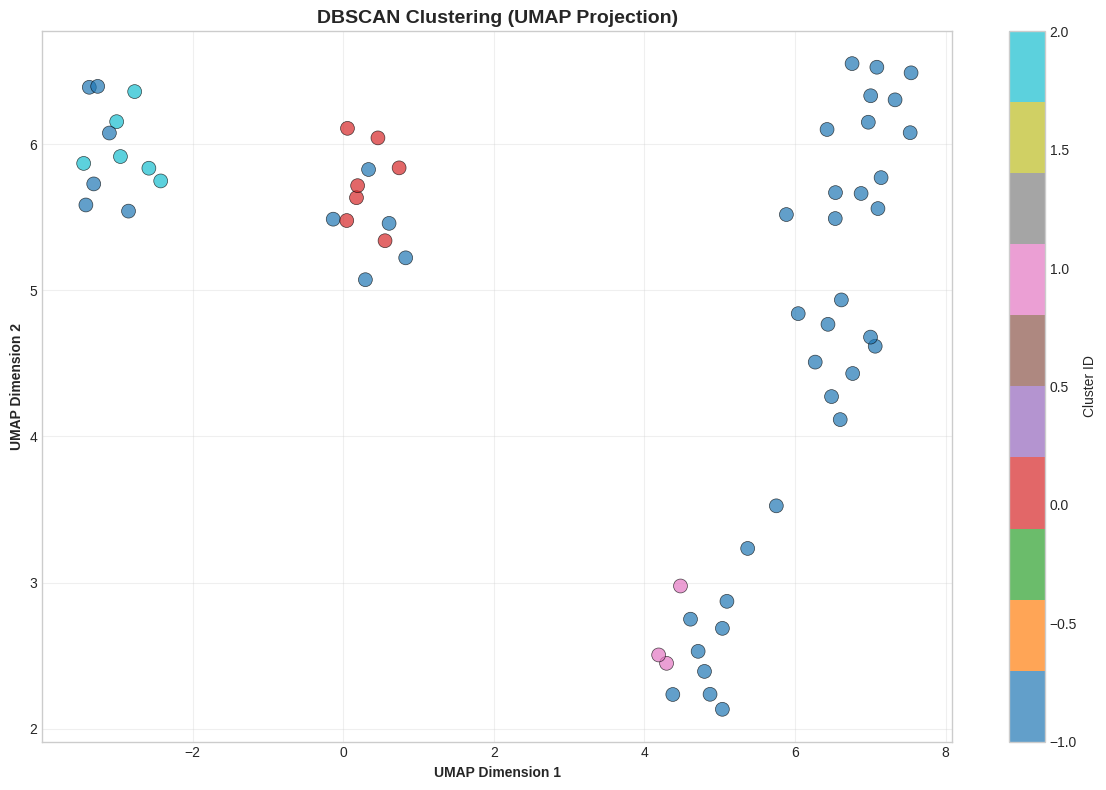

In [11]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3, metric='cosine')
labels_dbscan = dbscan.fit_predict(embeddings)

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print("="*60)
print("DBSCAN CLUSTERING RESULTS")
print("="*60)
print(f"Number of clusters found: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
print("\nCluster sizes:")
for i in range(-1, n_clusters_dbscan):
    count = np.sum(labels_dbscan == i)
    if i == -1:
        print(f"  Noise: {count} documents")
    else:
        print(f"  Cluster {i}: {count} documents ({count/len(labels_dbscan)*100:.1f}%)")
print("="*60)

# Visualize
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                     c=labels_dbscan, cmap='tab10',
                     s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
plt.title('DBSCAN Clustering (UMAP Projection)', fontweight='bold', fontsize=14)
plt.xlabel('UMAP Dimension 1', fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontweight='bold')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Hierarchical Clustering

HIERARCHICAL CLUSTERING RESULTS
Linkage method: Ward
Adjusted Rand Index: 0.9165
Normalized Mutual Information: 0.9282
Silhouette Score: 0.1231


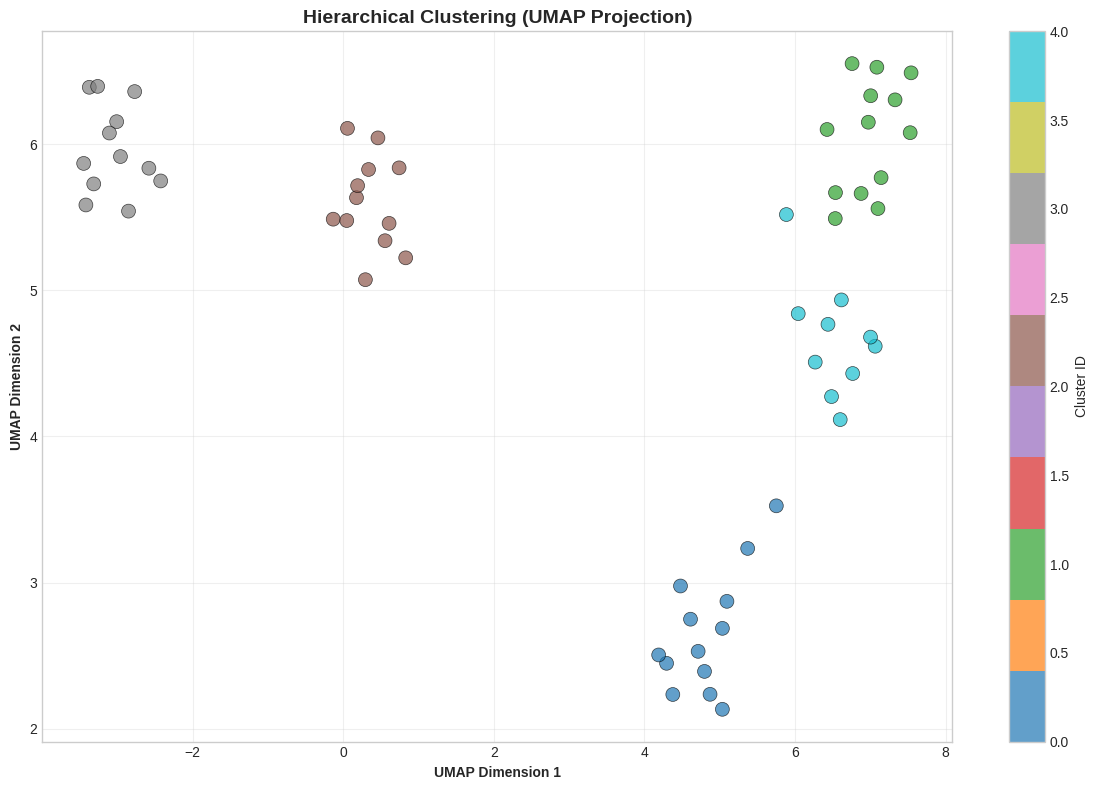

In [12]:
# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_agg = agg.fit_predict(embeddings)

# Calculate metrics
ari_agg = adjusted_rand_score(df_papers['topic'], labels_agg)
nmi_agg = normalized_mutual_info_score(df_papers['topic'], labels_agg)
sil_agg = silhouette_score(embeddings, labels_agg)

print("="*60)
print("HIERARCHICAL CLUSTERING RESULTS")
print("="*60)
print(f"Linkage method: Ward")
print(f"Adjusted Rand Index: {ari_agg:.4f}")
print(f"Normalized Mutual Information: {nmi_agg:.4f}")
print(f"Silhouette Score: {sil_agg:.4f}")
print("="*60)

# Visualize
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                     c=labels_agg, cmap='tab10',
                     s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
plt.title('Hierarchical Clustering (UMAP Projection)', fontweight='bold', fontsize=14)
plt.xlabel('UMAP Dimension 1', fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontweight='bold')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Compare All Clustering Methods


COMPARISON OF CLUSTERING METHODS
      Method      ARI      NMI  Silhouette
     K-Means 0.916291 0.928249    0.123263
Hierarchical 0.916486 0.928223    0.123074
      DBSCAN 0.102048 0.381919    0.019959


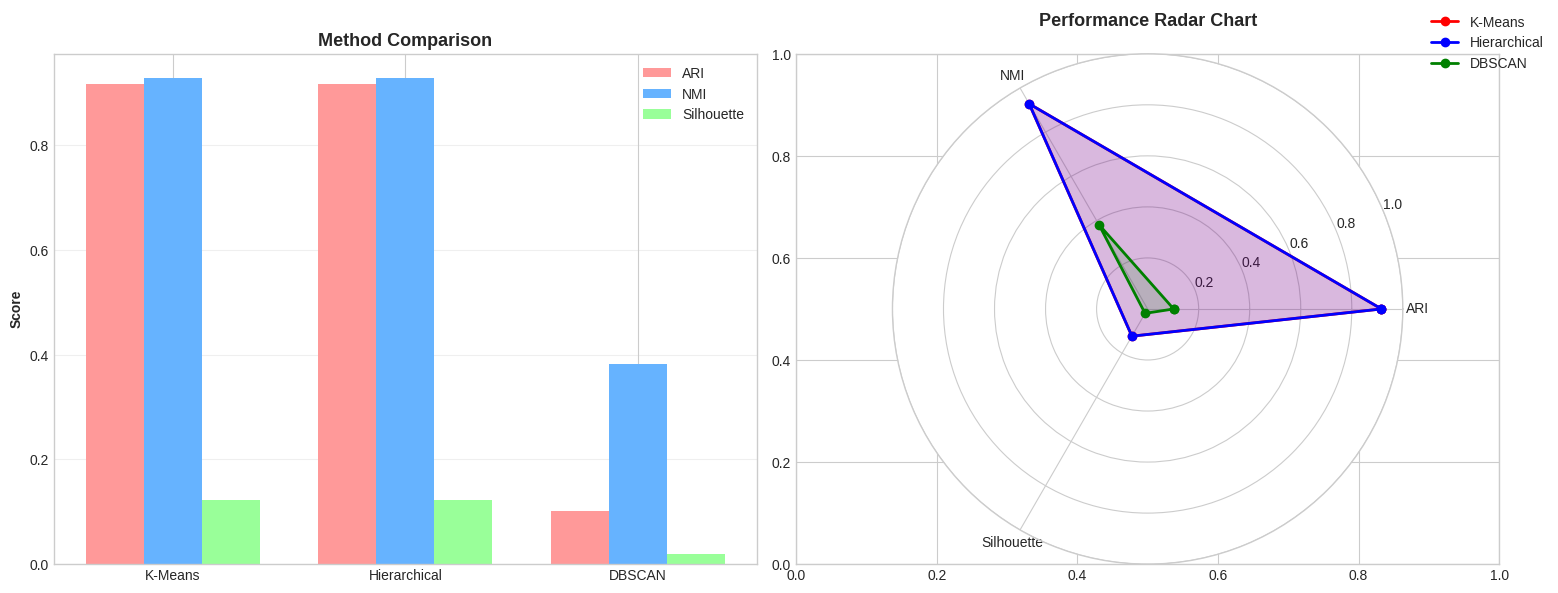


✓ Best performing method: Hierarchical


In [13]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'ARI': [ari_kmeans, ari_agg, adjusted_rand_score(df_papers['topic'], labels_dbscan)],
    'NMI': [nmi_kmeans, nmi_agg, normalized_mutual_info_score(df_papers['topic'], labels_dbscan)],
    'Silhouette': [sil_kmeans, sil_agg, silhouette_score(embeddings, labels_dbscan) if n_clusters_dbscan > 1 else 0]
})

print("\n" + "="*60)
print("COMPARISON OF CLUSTERING METHODS")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
x = np.arange(len(comparison_df))
width = 0.25

axes[0].bar(x - width, comparison_df['ARI'], width, label='ARI', color='#ff9999')
axes[0].bar(x, comparison_df['NMI'], width, label='NMI', color='#66b3ff')
axes[0].bar(x + width, comparison_df['Silhouette'], width, label='Silhouette', color='#99ff99')

axes[0].set_ylabel('Score', fontweight='bold')
axes[0].set_title('Method Comparison', fontweight='bold', fontsize=13)
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Method'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Radar chart
from math import pi

categories = ['ARI', 'NMI', 'Silhouette']
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

ax = plt.subplot(122, projection='polar')
colors = ['red', 'blue', 'green']

for idx, method in enumerate(comparison_df['Method']):
    values = comparison_df.iloc[idx][['ARI', 'NMI', 'Silhouette']].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=method, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
ax.set_title('Performance Radar Chart', fontweight='bold', fontsize=13, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

best_method = comparison_df.loc[comparison_df['ARI'].idxmax(), 'Method']
print(f"\n✓ Best performing method: {best_method}")

## 10. Topic Analysis: Extract Representative Documents

In [14]:
# For each cluster, find most central document
print("="*80)
print("REPRESENTATIVE DOCUMENTS FOR EACH CLUSTER (K-Means)")
print("="*80)

for cluster_id in range(n_clusters):
    # Get documents in this cluster
    cluster_mask = labels_kmeans == cluster_id
    cluster_docs = df_papers[cluster_mask]
    cluster_embeddings = embeddings[cluster_mask]

    # Find centroid
    centroid = cluster_embeddings.mean(axis=0)

    # Find closest document to centroid
    distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
    closest_idx = distances.argmin()
    representative_doc = cluster_docs.iloc[closest_idx]

    print(f"\nCluster {cluster_id} ({len(cluster_docs)} documents):")
    print(f"Dominant topic: {cluster_docs['topic_name'].mode()[0]}")
    print(f"Representative abstract:")
    print(f"  '{representative_doc['abstract'][:200]}...'")
    print(f"True topic distribution: {dict(cluster_docs['topic_name'].value_counts())}")

print("\n" + "="*80)

REPRESENTATIVE DOCUMENTS FOR EACH CLUSTER (K-Means)

Cluster 0 (12 documents):
Dominant topic: Blockchain
Representative abstract:
  'We develop privacy-preserving blockchain techniques using zero-knowledge proofs and homomorphic encryption for confidential transactions....'
True topic distribution: {'Blockchain': np.int64(12)}

Cluster 1 (13 documents):
Dominant topic: Bioinformatics
Representative abstract:
  'We develop a computational method for protein structure prediction using evolutionary information and deep learning. Accuracy rivals AlphaFold on benchmark datasets....'
True topic distribution: {'Bioinformatics': np.int64(12), 'Machine Learning': np.int64(1)}

Cluster 2 (12 documents):
Dominant topic: Machine Learning
Representative abstract:
  'We propose a novel deep learning architecture for image classification using attention mechanisms and residual connections. Our model achieves state-of-the-art performance on ImageNet....'
True topic distribution: {'Machine Learning': 

## Summary

**Key Findings:**

1. **Semantic Embeddings**: Transformer-based embeddings capture semantic meaning beyond keyword matching
2. **Clustering Performance**: K-Means and Hierarchical clustering work well on high-quality embeddings
3. **Dimensionality Reduction**: UMAP provides superior visualization of semantic clusters
4. **Topic Discovery**: Clusters align well with true research topics, demonstrating semantic understanding

**Practical Applications:**
- Automatic document organization and tagging
- Content recommendation systems
- Customer feedback categorization
- Research paper discovery
- News article grouping

**Best Practices:**
- Use pre-trained language models for semantic embeddings
- Try multiple clustering algorithms and compare
- Use UMAP for visualization of high-dimensional embeddings
- Validate clusters with domain knowledge